In [46]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import shutil
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [13]:

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/horse-or-human.zip"
path_to_zip = tf.keras.utils.get_file('horse-or-human.zip', origin=dataset_url, extract=True)

# Caminho onde os dados foram extraídos
data_dir = "romario.santos/Documents/Deep learning/"
data_dir = os.path.dirname(path_to_zip)
print(f"Dataset extraído em: {data_dir}")

Dataset extraído em: C:\Users\romario.santos\.keras\datasets


Criar datasets de treino e validação.

In [10]:
dataset_dir = "../dataset/horse-or-human_extracted"
train_dir ='../dataset/train'
validation_dir = "../dataset/validation"

In [9]:
# Criar pastas de treino e validação
os.makedirs(train_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)

In [ ]:
# dividir imagens 
classes = os.listdir(dataset_dir)
for class_name in classes:
    class_path = os.path.join(dataset_dir, class_name)
    images = os.listdir(class_path)
    
    # Dividir os dados
    train_imgs, val_imgs = train_test_split(images, test_size=0.2, random_state=42)

    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(validation_dir, class_name), exist_ok=True)
    
    # Mover as imagens
    for img in train_imgs:
        shutil.move(os.path.join(class_path, img), os.path.join(train_dir, class_name, img))
    for img in val_imgs:
        shutil.move(os.path.join(class_path, img), os.path.join(validation_dir, class_name, img))

In [18]:
# tratamento das imagens 
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(300,300), # tamanho da img
    batch_size=128, # conjuntos de 128
    class_mode='binary' # classificação binaria
)


validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(300,300),
    batch_size=32,
    class_mode='binary'
)

Found 901 images belonging to 2 classes.
Found 126 images belonging to 2 classes.


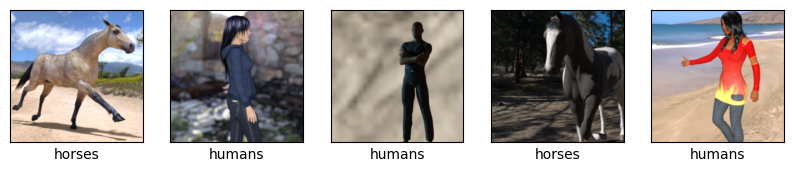

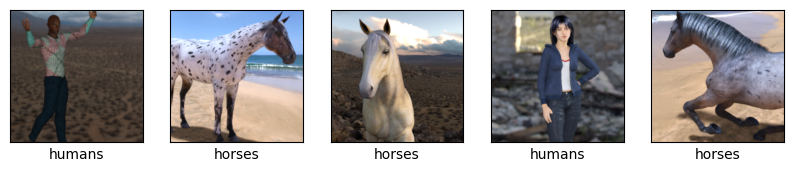

In [54]:
# Obter um lote de imagens e rótulos train
images, labels = next(train_generator)  
#validation
imagesv, labelsv = next(train_generator) 

# Obter os nomes das classes train
classe_names = list(train_generator.class_indices.keys()) 
#validation
classe_namesv = list(train_generator.class_indices.keys())  


# Visualizar as primeiras 5 imagens train
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(images[i], cmap=plt.cm.binary)  
    plt.xlabel(classe_names[int(labels[i])])  
plt.show()

#validation
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([]) 
    plt.yticks([])
    plt.imshow(imagesv[i], cmap=plt.cm.binary)  
    plt.xlabel(classe_namesv[int(labelsv[i])])  
plt.show()

Model para classificar.

In [29]:
from tensorflow.keras import layers, models

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu',
        input_shape = (300,300,3)), # entrada das imagens e rgb(3 bytes)
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid') # uma camada, onde com a sigmoid, trasnforma valor de saida 0 ou 1 (classificação binaria)

])

c:\Users\romario.santos\AppData\Local\anaconda3\envs\romario\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 298, 298, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 149, 149, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 147, 147, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 73, 73, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 71, 71, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 35, 35, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 78400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    40,141,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,165,409 (153.22 MB)

 Trainable params: 40,165,409 (153.22 MB)

 Non-trainable params: 0 (0.00 B)

In [61]:
from tensorflow.keras.optimizers import RMSprop

# compilar com loss binario (cavalo ou humano)  
model.compile(loss='binary_crossentropy',
optimizer=RMSprop(learning_rate=0.001),
metrics=['accuracy'])

In [70]:
# treinar modelo

history = model.fit(
    train_generator,
    steps_per_epoch=8, # imgs por epoca
    epochs=15, # epocas total
    validation_data=validation_generator,
    validation_steps=8, # epocas de validação
    verbose=2 # informações durante treinamento
)

Epoch 1/15
8/8 - 11s - 1s/step - accuracy: 0.6648 - loss: 0.6388 - val_accuracy: 0.8651 - val_loss: 0.4108
Epoch 2/15


c:\Users\romario.santos\AppData\Local\anaconda3\envs\romario\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


8/8 - 10s - 1s/step - accuracy: 0.8024 - loss: 0.4857 - val_accuracy: 0.8413 - val_loss: 0.7142
Epoch 3/15
8/8 - 10s - 1s/step - accuracy: 0.7936 - loss: 0.7412 - val_accuracy: 0.4286 - val_loss: 0.8939
Epoch 4/15
8/8 - 9s - 1s/step - accuracy: 0.7936 - loss: 0.5069 - val_accuracy: 0.8810 - val_loss: 0.3309
Epoch 5/15
8/8 - 9s - 1s/step - accuracy: 0.9190 - loss: 0.2467 - val_accuracy: 0.8492 - val_loss: 0.3401
Epoch 6/15
8/8 - 9s - 1s/step - accuracy: 0.8968 - loss: 0.3337 - val_accuracy: 0.9603 - val_loss: 0.1131
Epoch 7/15
8/8 - 9s - 1s/step - accuracy: 0.9645 - loss: 0.1034 - val_accuracy: 0.9921 - val_loss: 0.0424
Epoch 8/15
8/8 - 9s - 1s/step - accuracy: 0.9678 - loss: 0.0823 - val_accuracy: 0.8730 - val_loss: 0.2664
Epoch 9/15
8/8 - 9s - 1s/step - accuracy: 0.9201 - loss: 0.1752 - val_accuracy: 0.9841 - val_loss: 0.0443
Epoch 10/15
8/8 - 9s - 1s/step - accuracy: 0.9811 - loss: 0.0495 - val_accuracy: 0.9762 - val_loss: 0.0583
Epoch 11/15
8/8 - 9s - 1s/step - accuracy: 0.9767 - lo

Testando modelo treinado 

In [92]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Caminho para a imagem
input_data = "../dataset/train/humans/human01-23.png"

# Carregar a imagem e redimensionar para o tamanho que o modelo espera
img = load_img(input_data, target_size=(300, 300))

# Converter a imagem para um array NumPy
img_array = img_to_array(img)

# Normalizar os valores dos pixels (se o modelo foi treinado com normalização)
img_array = img_array / 255.0  # Normalização para o intervalo [0, 1]

# Adicionar uma dimensão para representar o lote (batch)
img_array = np.expand_dims(img_array, axis=0)  # Agora o formato é (1, 300, 300, 3)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


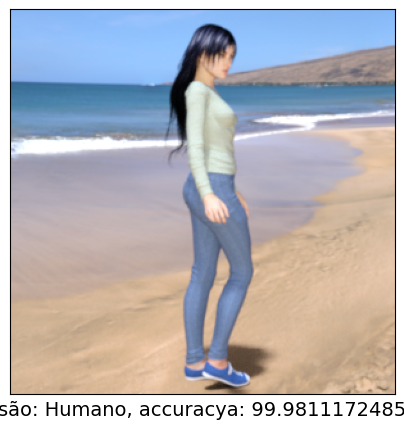

In [93]:
# Fazer a previsão
prediction = model.predict(img_array)

probability = prediction[0][0]  # Pegue o valor da probabilidad
# Interpretar o resultado
if probability > 0.5:  
    result = 'Humano'
    confidence = probability * 100 
else:
    result = 'Cavalo'
    confidence = (1- probability * 100 )

# Plotar a imagem e o resultado
plt.figure(figsize=(5, 5))
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.imshow(img)  # Mostra a imagem carregada
plt.xlabel(f"Previsão: {result}, accuracya: {confidence}", fontsize=14)  # Mostra o rótulo previsto
plt.show()